In [35]:
import requests
from bs4 import BeautifulSoup
from gensim.parsing.preprocessing import STOPWORDS
import gensim.summarization

# hindunilvr earning report

In [677]:
url = 'https://finance.yahoo.com/news/edited-transcript-hindunilvr-nse-earnings-230357637.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

In [678]:
earning_report_1 = ' '.join([i.text for i in soup.find_all('p')])

In [679]:
earning_report_1

"Q3 2020 Hindustan Unilever Ltd Earnings Call Mumbai Feb 7, 2020 (Thomson StreetEvents) -- Edited Transcript of Hindustan Unilever Ltd earnings conference call or presentation Friday, January 31, 2020 at 12:30:00pm GMT TEXT version of Transcript ================================================================================ Corporate Participants ================================================================================ * Sanjiv Mehta Hindustan Unilever Limited - Chairman, CEO & MD * Srinivas Phatak Hindustan Unilever Limited - Executive Director of Finance & IT, CFO & Executive Director * Suman Hegde Hindustan Unilever Limited - Group Controller ================================================================================ Conference Call Participants ================================================================================ * Abneesh Roy Edelweiss Securities Ltd., Research Division - SVP * Aditya Soman Goldman Sachs Group Inc., Research Division - Equity Analyst * Amit

In [680]:
from nltk import sent_tokenize,word_tokenize 
sent = sent_tokenize(earning_report_1)[1:]
full_text = ''
for item in sent:
    if '----' in item:
        item = item.split('- ')[-1]
    full_text = full_text + ' ' + item

In [681]:
full_text

" (Operator Instructions) Please note that this conference is being recorded. I now hand the conference over to Ms. Suman Hegde, Group Controller and Head of Investor Relations. Thank you, and over to you, ma'am. Thanks, Raymond. Good evening, and welcome to the conference call of Hindustan Unilever Limited. We will confirm in this evening results for the quarter ended 31st December 2019. On the call from the HUL end, we have Mr. Sanjiv Mehta, Chairman and Managing Director; and Mr. Srinivas Phatak, CFO, HUL. As is customary, we will start the presentation, with Sanjiv sharing his perspective on markets and HUL business and then hand over to Srinivas to talk through the details of our performance for the quarter. Before we get started with the presentation, I would like to draw your attention to the safe harbor statement included in the deck for good order sake. With that, over to you, Sanjiv. Hi, good evening, everyone. And let me first talk about our clear and compelling strategy. An

In [682]:
texts = [word for word in full_text.lower().split() if word not in STOPWORDS and word.isalnum() and len(word) > 2]

In [683]:
new_text = ' '.join(texts)

In [684]:
new_text

'please note conference now hand conference suman group controller head investor thank good welcome conference call hindustan unilever will confirm evening results quarter ended 31st december call hul sanjiv chairman managing srinivas will start sanjiv sharing perspective markets hul business hand srinivas talk details performance started draw attention safe harbor statement included deck good order good let first talk clear compelling remain committed strategic agenda delivering profitable responsible something new calls manage business long term investing behind keep winning underpinned hinging fundamental beliefs brands purpose companies purpose last people purpose now moving market market growth l3m basis now slowed 2018 levels value terms volume rural seen much sharper deceleration growth index urban now urban growth slowed market witnessed disparate trends across categories discretionary seeing bigger foods category relatively insulated due crude currency continued volatile due g

In [685]:
from gensim.utils import lemmatize
lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(new_text)]
lemma_text = ' '.join(lemmatized_out)

In [686]:
lemma_text

'please note conference now hand conference suman group controller head investor thank good welcome conference call hindustan unilever confirm evening result quarter end st december call hul sanjiv chairman manage srinivas start sanjiv sharing perspective market hul business hand srinivas talk detail performance start draw attention safe harbor statement include deck good order good let first talk clear compelling remain commit strategic agenda deliver profitable responsible something new call manage business long term investing behind keep winning underpin hinge fundamental belief brand purpose company purpose last person purpose now move market market growth basis now slow level value term volume rural see much sharper deceleration growth index urban now urban growth slow market witness disparate trend category discretionary see bigger food category relatively insulate due crude currency continue volatile due geopolitical global economic cycle trade start see inflationary trend certa

## Draw WordCloud

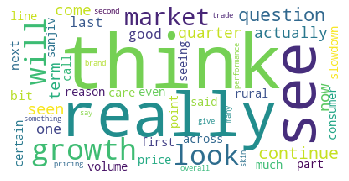

In [687]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from random import shuffle
shuffle(texts)
text = ' '.join(texts)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=50).generate(text)

plt.axis('off')
plt.imshow(wordcloud)



## Text summarization

In [689]:
summary = gensim.summarization.summarize(full_text, word_count=100) 
print(summary)

As is customary, we will start the presentation, with Sanjiv sharing his perspective on markets and HUL business and then hand over to Srinivas to talk through the details of our performance for the quarter.
As we said, in Home Care, both Fabric Wash and Household Care, we have seen good growth and aided by core, aided by premiumization and market development, and we've started to see the benefits of this.
The inflation has been much higher, but we're being actually very judicious in terms of how we look at different parts of the portfolio, but you will see some bit of pricing coming through in due course.


In [485]:
summary = gensim.summarization.summarize(full_text, word_count=500) 

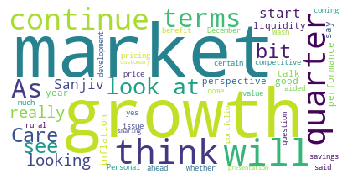

In [486]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=50).generate(summary)

plt.axis('off')
plt.imshow(wordcloud)

## Keyword Extraction

In [690]:
keyword = gensim.summarization.keywords(text = lemma_text, words = 20, lemmatize = True).split('\n')

In [691]:
' '.join(keyword)

'think look growth actual term marketing question quarters continued talked pricing good bit certain launched happened brand slowdown line volume'

In [488]:
keyword

['think',
 'look',
 'growth',
 'actual',
 'term',
 'marketing',
 'question',
 'quarters continued',
 'talked',
 'pricing',
 'good',
 'bit',
 'certain',
 'launched',
 'happened',
 'brand',
 'slowdown',
 'line',
 'volume']

## Calculate the frequency for n-grams

In [490]:
vectorizer = CountVectorizer(ngram_range = (2,2)) 
X1 = vectorizer.fit_transform(sent_tokenize(new_text))  
features = (vectorizer.get_feature_names()) 
print("Features : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 

Features : 
 ['15th 16th', '16th probably', '190 basis', '2018 levels', '210 bps', '210 comparable', '300 basis', '300 bps', '31st december', '31st domestic', '335 basis', '800 basis', '800 bps', 'able bring', 'able come', 'able continue', 'able crack', 'able give', 'able glad', 'able think', 'able use', 'abneesh roy', 'absolute even', 'absolute quantum', 'absolute ultimate', 'absolutely gained', 'absolutely gaining', 'absolutely habit', 'absolutely remained', 'absolutely saying', 'absolutely slowed', 'accelerate growth', 'accelerated current', 'access clean', 'accounting government', 'accounts remaining', 'accrued bit', 'across broad', 'across categories', 'across different', 'across give', 'across much', 'across multiple', 'across obviously', 'across popular', 'across premium', 'across price', 'across really', 'across seen', 'across set', 'across something', 'across talked', 'across tea', 'across value', 'act complementary', 'action personal', 'action taken', 'activation wheel', 'act

In [491]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vectorizer = TfidfVectorizer(ngram_range = (2,2)) 
X2 = vectorizer.fit_transform(sent_tokenize(new_text))
scores = (X2.toarray()) 

In [492]:
scores

array([[0.01244953, 0.01244953, 0.01244953, ..., 0.01244953, 0.01244953,
        0.01244953]])

In [493]:
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("Words head : \n", words.head(20)) 

Words head : 
                     term      rank
2234       next question  0.224091
2728       question line  0.174293
2816         really look  0.149394
3284           skin care  0.112046
3708        think really  0.099596
881       demand outlook  0.087147
3081     second question  0.087147
4028       will continue  0.087147
2037       market growth  0.087147
4050            will see  0.074697
3712        think sanjiv  0.074697
3690     think important  0.074697
1534           home care  0.074697
2032  market development  0.062248
857     december quarter  0.062248
1183      first question  0.062248
3728          think will  0.062248
1966         love beauty  0.062248
3676      think continue  0.049798
3670          think best  0.049798


In [494]:
x_data = list(range(15))
y_data = list(words['rank'])[:15]
z_data = list(words['term'])[:15]
annotations = [
    dict(
        x=x_data[i], 
        y=y_data[i],
        text=z_data[i], # Some conditional to define outliers
        showarrow=False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for i in range(15)
]
trace0 = go.Scatter(
    x=x_data,
    y=y_data,
    mode='markers',
    marker=dict(
        size=[i*100 for i in y_data],
    )
)

data = [trace0]
layout = go.Layout(annotations=annotations)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [495]:
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(sent_tokenize(new_text))  
features = (vectorizer.get_feature_names()) 
print("Features : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 

Features : 
 ['15th 16th probably', '16th probably data', '190 basis points', '2018 levels value', '210 bps ebitda', '210 comparable really', '300 basis points', '300 bps pricing', '31st december call', '31st domestic consumer', '335 basis points', '800 basis point', '800 bps kind', 'able bring started', 'able come back', 'able continue maintain', 'able crack viable', 'able give perspective', 'able glad read', 'able think right', 'able use multiple', 'abneesh roy first', 'absolute even talk', 'absolute quantum rupees', 'absolute ultimate oral', 'absolutely gained will', 'absolutely gaining continue', 'absolutely habit twice', 'absolutely remained look', 'absolutely saying growths', 'absolutely slowed still', 'accelerate growth really', 'accelerated current things', 'access clean drinking', 'accounting government base', 'accounts remaining taken', 'accrued bit higher', 'across broad whether', 'across categories discretionary', 'across different parts', 'across give flavor', 'across much

In [496]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(sent_tokenize(new_text))
scores = (X2.toarray()) 

In [497]:
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("Words head : \n", words.head(20)) 

Words head : 
                                    term      rank
2399                 next question line  0.187307
1018           domestic consumer growth  0.057633
1636                    home care foods  0.057633
4026                  think really look  0.043225
3751               still growing faster  0.043225
925   delivering profitable responsible  0.043225
3065               really saying growth  0.028817
3379                      see parts see  0.028817
4035                think sanjiv spoken  0.028817
1387                global tea business  0.028817
329              binoy jariwala sunidhi  0.028817
4033             think sanjiv explained  0.028817
3386                   see reason start  0.028817
4053                    think will good  0.028817
39               across different parts  0.028817
2042                     look skin care  0.028817
4028                   think really see  0.028817
2929             question amit sachdeva  0.028817
261                beauty personal 

In [498]:
list(words['term'])

['next question line',
 'domestic consumer growth',
 'home care foods',
 'think really look',
 'still growing faster',
 'delivering profitable responsible',
 'really saying growth',
 'see parts see',
 'think sanjiv spoken',
 'global tea business',
 'binoy jariwala sunidhi',
 'think sanjiv explained',
 'see reason start',
 'think will good',
 'across different parts',
 'look skin care',
 'think really see',
 'question amit sachdeva',
 'beauty personal care',
 'look december quarter',
 'will see bit',
 'steady domestic consumer',
 'now really look',
 'parts see parts',
 'look cash carry',
 'portfolio point view',
 'performance home care',
 'september quarter december',
 'sanjiv already answered',
 'premium still growing',
 'thought process judicious',
 'margin expansion comparable',
 'next question amit',
 'skin care skin',
 'general trade modern',
 'amit sachdeva hsbc',
 'overall markets slowing',
 'process judicious price',
 'something will continue',
 'inr inr inr',
 'slowdown bit pro

In [499]:
x_data = list(range(10))
y_data = list(words['rank'])[:10]
z_data = list(words['term'])[:10]
annotations = [
    dict(
        x=x_data[i], 
        y=y_data[i],
        text=z_data[i], # Some conditional to define outliers
        showarrow=False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for i in range(10)
]
trace0 = go.Scatter(
    x=x_data,
    y=y_data,
    mode='markers',
    marker=dict(
        size=[i*1000 for i in y_data],
    )
)

data = [trace0]
layout = go.Layout(annotations=annotations)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Noun Chunks Analysis

In [500]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(full_text)
chunk_list = []
for chunk in doc.noun_chunks:
    #print(chunk.text)
    chunk = ' '.join([word for word in str(chunk.text).split() if word not in STOPWORDS])
    #print(chunk)
    #print(len(chunk.split(' ')))
    if not (len(chunk.split(' ')) == 0 or len(chunk.split(' ')) == 1):
        chunk_list.append(chunk)

In [501]:
chunk_list

['Operator Instructions',
 'Ms. Suman Hegde',
 'Group Controller',
 'Investor Relations',
 'Good evening',
 'conference call',
 'Hindustan Unilever Limited',
 'evening results',
 'HUL end',
 'Mr. Sanjiv Mehta',
 'Managing Director',
 'Mr. Srinivas Phatak',
 'HUL business',
 'safe harbor statement',
 'good order sake',
 'clear compelling strategy',
 'strategic agenda',
 'consistent, competitive, profitable responsible growth',
 'long term',
 '3 fundamental beliefs',
 'market context',
 'market growth',
 'L3M basis',
 '2018 levels',
 'value terms',
 'volume terms',
 'much sharper deceleration',
 'growth index',
 'Urban growth',
 'disparate trends',
 'bigger impact',
 'Foods category',
 'geopolitical imperatives',
 'global economic cycles',
 'trade dynamics',
 'inflationary trend',
 'certain select commodities',
 'palm oil',
 'The overall market environment',
 'liquidity issues',
 'retail inflation',
 'GDP growth estimate',
 'unemployment rate peaking',
 'overall consumer sentiment weaken

In [502]:
chunk_dict = dict()
for i in chunk_list:
    if chunk_dict.get(i):
        chunk_dict[i] += 1
    else:
        chunk_dict[i] = 1

In [503]:
sort_list = sorted(chunk_dict.items(), key=lambda x: x[1], reverse=True)

In [504]:
list(zip(*sort_list))

[('The next question',
  'market growth',
  'market development',
  'Home Care',
  'December quarter',
  'Skin Care',
  'demand outlook',
  'Love Beauty',
  'delayed winter',
  'Lever Ayush',
  'different parts',
  'market context',
  'steady performance',
  'Oral Care',
  'modern trade',
  'rural slowdown',
  'comparable basis',
  'net profit',
  'good performance',
  'Personal Care',
  'September quarter',
  'Q&A session',
  'market share',
  'strategic review',
  'last quarters',
  'many things',
  'last years',
  'overall markets',
  'better mix',
  'direct distribution',
  'urban demand',
  'rural demand',
  'Hindustan Unilever Limited',
  'consistent, competitive, profitable responsible growth',
  'value terms',
  'volume terms',
  'liquidity issues',
  'rural consumers',
  'margin improvement',
  'execution prowess',
  'consistent strategy',
  'last quarter',
  'challenging market condition',
  'new opportunities',
  'differentiated consumer insights',
  'FMCG sector',
  'overal

In [505]:
x_data = list(range(10))
y_data = list(zip(*sort_list))[1][:10]
z_data = list(zip(*sort_list))[0][:10]
annotations = [
    dict(
        x=x_data[i], 
        y=y_data[i],
        text=z_data[i], # Some conditional to define outliers
        showarrow=False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
    ) for i in range(10)
]
trace0 = go.Scatter(
    x=x_data,
    y=y_data,
    mode='markers',
    marker=dict(
        size=[i*10 for i in y_data],
    )
)

data = [trace0]
layout = go.Layout(annotations=annotations)

fig = go.Figure(data=data, layout=layout)
fig.show()

## Sentiment Analysis

### Earning report

In [506]:
import pandas as pd

In [507]:
def get_nrc_data():
    nrc = r'NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt'
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [508]:
def emotion_analyzer(text,emotion_dict=get_nrc_data()):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0
    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [509]:
def comparative_emotion_analyzer(text_tuples,object_name="Company"):
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'])
    df.set_index(object_name,inplace=True)
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output

In [510]:
Earning_report_emotion = comparative_emotion_analyzer([('earning_report',new_text)])

In [511]:
Earning_report_emotion

Fear     Trust  Negative  Positive       Joy   Disgust  \
Company                                                                      
earning_report  0.015849  0.063394  0.036099  0.121065  0.032357  0.004402   

                Anticipation   Sadness  Surprise  
Company                                           
earning_report      0.046665  0.014748  0.013867

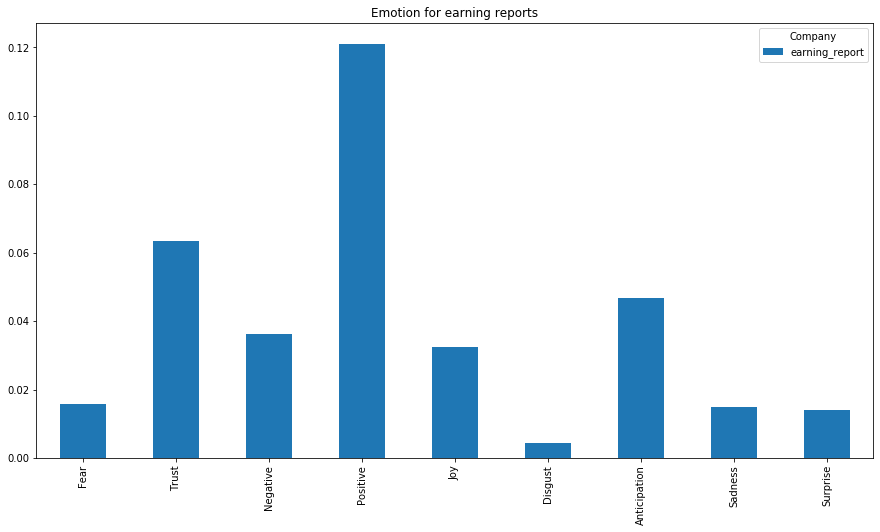

In [512]:
Earning_report_emotion.T.plot(kind='bar',title="Emotion for earning reports",figsize=(15,8))

### Keywords

In [532]:
import collections, functools, operator 
def keyword_sentiment_nrc(keyword,full_text):
    sent = sent_tokenize(full_text)
    count = 0
    dict_list = []
    for sentences in sent:
        if keyword in [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentences)]:
            count += 1
            keyword_dict = emotion_analyzer(sentences)
            dict_list.append(keyword_dict)
            count += 1
    result = dict(functools.reduce(operator.add, map(collections.Counter, dict_list)))
    for key, value in result.items():
        result[key] = value/count
    return result

In [533]:
keyword_sentiment_nrc('think',full_text)

{'trust': 0.009975265229767256,
 'surprise': 0.0017067800975894367,
 'positive': 0.018545968581259866,
 'sadness': 0.0015145339821182019,
 'anticipation': 0.008702202901541447,
 'joy': 0.0028985148446808605,
 'negative': 0.005161476143435618,
 'fear': 0.0013517772138461792,
 'disgust': 0.00027171890121342957,
 'anger': 0.0017836143707825678}

In [534]:
df_keyword_nrc = pd.DataFrame([keyword_sentiment_nrc('think',full_text)], index = ['think'])
df_keyword_nrc

trust  surprise  positive   sadness  anticipation       joy  \
think  0.009975  0.001707  0.018546  0.001515      0.008702  0.002899   

       negative      fear   disgust     anger  
think  0.005161  0.001352  0.000272  0.001784

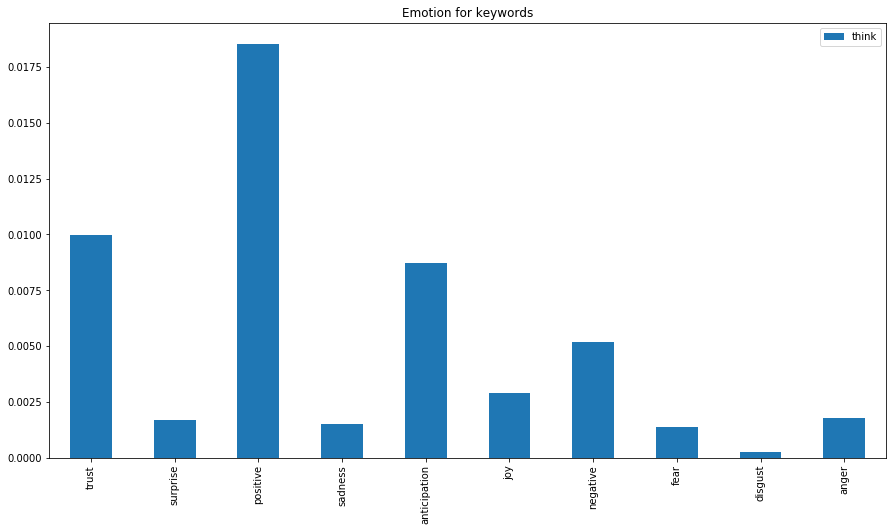

In [535]:
df_keyword_nrc.T.plot(kind='bar',title="Emotion for keywords",figsize=(15,8))

In [563]:
from pattern.en import sentiment
def keyword_sentiment_pattern(keyword,full_text):
    sent = sent_tokenize(full_text)
    count = 0
    sen = 0
    sub = 0
    for sentences in sent:
        if keyword in [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentences)]:
            count += 1
            #print(sentences)
            senti_tuple = sentiment(sentences)
            sen += senti_tuple[0]
            sub += senti_tuple[1]
    sen = sen/count
    sub = sub/count
    return {'sentiment':sen, 'subjectivity':sub}

In [566]:
sent_dict = {}
for key in keyword[:7]:
    sent_dict[key] = keyword_sentiment_pattern(key, full_text)
sent_df = pd.DataFrame(sent_dict)

In [567]:
sent_df.T

sentiment  subjectivity
think       0.177084      0.337198
look        0.092596      0.336540
growth      0.133385      0.351083
actual      0.000000      0.100000
term        0.153245      0.405505
marketing   0.133333      0.300000
question    0.045260      0.165126

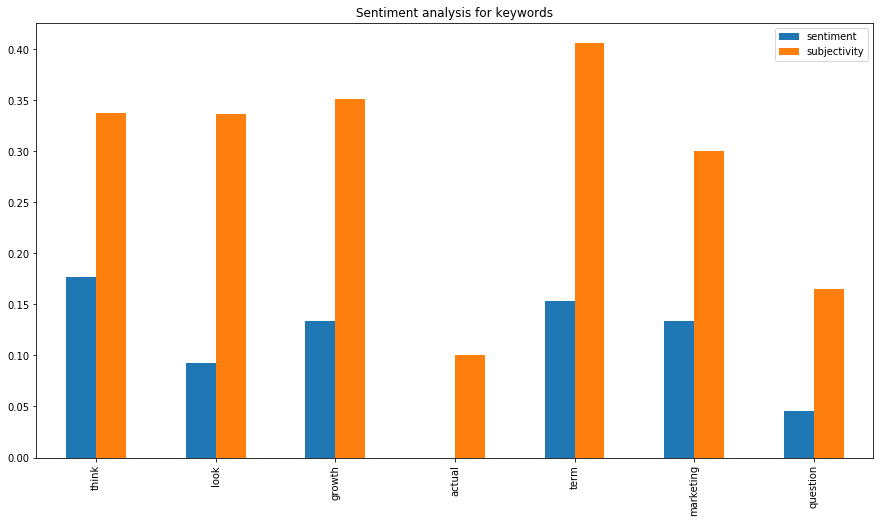

In [568]:
sent_df.T.plot(kind='bar',title="Sentiment analysis for keywords",figsize=(15,8))

## Modality distribution for the earning reports

In [211]:
from pattern.en import parse, Sentence
from pattern.en import modality
sentences = sent_tokenize(full_text)
mod_list = []
for sentence in sentences:
    sent = parse(sentence, lemmata=True)
    sent = Sentence(sent)
    mod_list.append(modality(sent))
mod_list

[0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 0.75,
 0.6785714285714286,
 -0.25,
 1.0,
 1.0,
 0.5,
 0.75,
 0.25,
 0.5625,
 0.75,
 0.75,
 1.0,
 0.625,
 1.0,
 0.5416666666666666,
 1.0,
 1.0,
 0.25,
 -0.25,
 0.25,
 0.75,
 0.6785714285714286,
 0.75,
 0.75,
 0.5625,
 0.5833333333333334,
 0.75,
 0.75,
 0.5,
 0.75,
 0.75,
 0.5,
 0.75,
 0.25,
 0.55,
 0.55,
 0.625,
 0.5,
 0.55,
 0.5,
 0.6875,
 1.0,
 0.625,
 0.5,
 0.75,
 0.75,
 0.5,
 0.75,
 0.55,
 0.75,
 0.4375,
 0.5,
 1.0,
 0.2222222222222222,
 1.0,
 0.625,
 0.75,
 0.5833333333333334,
 0.75,
 0.5833333333333334,
 0.625,
 0.025,
 0.65,
 0.5357142857142857,
 0.75,
 1.0,
 0.7,
 0.725,
 0.75,
 0.6875,
 0.19444444444444445,
 0.75,
 0.1388888888888889,
 1.0,
 0.5833333333333334,
 0.5833333333333334,
 0.75,
 0.6,
 0.5833333333333334,
 0.7115384615384616,
 0.53125,
 0.6388888888888888,
 0.75,
 0.75,
 0.5,
 0.5357142857142857,
 0.75,
 1.0,
 0.75,
 0.75,
 0.5416666666666666,
 0.75,
 0.3,
 0.6785714285714286,
 0.75,
 0.6071428571428571,
 0.75,
 0.75,
 0.625,
 0.

In [214]:
facts = len([i for i in mod_list if i >= 0.5])
non_facts = len([i for i in mod_list if i < 0.5])
print(facts)
print(non_facts)
print(facts/non_facts)

535
225
2.3777777777777778


In [218]:
import plotly.figure_factory as ff
import numpy as np
group_labels = ['Modality distribution for earning reports'] # name of the dataset
fig = ff.create_distplot([mod_list], group_labels, bin_size=.1)
fig.show()

## Colgate annual report

In [694]:
f = open("colgate annual report.txt", "r")
raw_text = f.read()

In [695]:
type(raw_text)

str

In [696]:
texts = raw_text.strip().split('\n\n\n')

In [590]:
len(texts)

26

### write the code before into functions

In [570]:
def text_clean(full_text):
    texts = [word for word in full_text.lower().split() if word not in STOPWORDS and word.isalnum() and len(word) > 2]
    new_text = ' '.join(texts)
    return new_text

In [571]:
def text_lemma(new_text):
    from gensim.utils import lemmatize
    lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(new_text)]
    lemma_text = ' '.join(lemmatized_out)
    return lemma_text

In [572]:
def wordcloud(full_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    texts = [word for word in full_text.lower().split() if word not in STOPWORDS and word.isalnum() and len(word) > 2]
    text = ' '.join(texts)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=50).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)



In [573]:
def text_summarization(full_text,n):
    summary = gensim.summarization.summarize(full_text, word_count=n) 
    return summary

In [574]:
def keyword_extraction(lemma_text, n):
    keyword = gensim.summarization.keywords(text = lemma_text, words = n, lemmatize = True).split('\n')
    return keyword

In [575]:
def two_grams_frequency(new_text):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
    vectorizer = CountVectorizer(ngram_range = (2,2)) 
    X1 = vectorizer.fit_transform(sent_tokenize(new_text))  
    features = (vectorizer.get_feature_names())
    vectorizer = TfidfVectorizer(ngram_range = (2,2)) 
    X2 = vectorizer.fit_transform(sent_tokenize(new_text))
    scores = (X2.toarray())
    sums = X2.sum(axis = 0) 
    data1 = [] 
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 
    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False)) 
    return words

In [576]:
def three_grams_frequency(new_text):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
    vectorizer = CountVectorizer(ngram_range = (3,3)) 
    X1 = vectorizer.fit_transform(sent_tokenize(new_text))  
    features = (vectorizer.get_feature_names())
    vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
    X2 = vectorizer.fit_transform(sent_tokenize(new_text))
    scores = (X2.toarray())
    sums = X2.sum(axis = 0) 
    data1 = [] 
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 
    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False)) 
    return words

In [577]:
def bubble_chart(words, mul, num):
    x_data = list(range(num))
    y_data = list(words['rank'])[:num]
    z_data = list(words['term'])[:num]
    annotations = [
        dict(
            x=x_data[i], 
            y=y_data[i],
            text=z_data[i], # Some conditional to define outliers
            showarrow=False,
            xanchor='center',  # Position of text relative to x axis (left/right/center)
            yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
        ) for i in range(num)
    ]
    trace0 = go.Scatter(
        x=x_data,
        y=y_data,
        mode='markers',
        marker=dict(
            size=[i*mul for i in y_data],
        )
    )

    data = [trace0]
    layout = go.Layout(annotations=annotations)

    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [578]:
def noun_chunks(full_text):
    import spacy

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(full_text)
    chunk_list = []
    for chunk in doc.noun_chunks:
        #print(chunk.text)
        chunk = ' '.join([word for word in str(chunk.text).split() if word not in STOPWORDS])
        #print(chunk)
        #print(len(chunk.split(' ')))
        if not (len(chunk.split(' ')) == 0 or len(chunk.split(' ')) == 1):
            chunk_list.append(chunk)
        chunk_dict = dict()
        for i in chunk_list:
            if chunk_dict.get(i):
                chunk_dict[i] += 1
            else:
                chunk_dict[i] = 1
        sort_list = sorted(chunk_dict.items(), key=lambda x: x[1], reverse=True)
        return sort_list

In [579]:
def bubble_chart_noun_chunks(sort_list, mul, num):
    x_data = list(range(num))
    y_data = list(zip(*sort_list))[1][:num]
    z_data = list(zip(*sort_list))[0][:num]
    annotations = [
        dict(
            x=x_data[i], 
            y=y_data[i],
            text=z_data[i], # Some conditional to define outliers
            showarrow=False,
            xanchor='center',  # Position of text relative to x axis (left/right/center)
            yanchor='top' if i%2 else 'bottom',  # Position of text relative to y axis (top/bottom/middle)
        ) for i in range(num)
    ]
    trace0 = go.Scatter(
        x=x_data,
        y=y_data,
        mode='markers',
        marker=dict(
            size=[i*mul for i in y_data],
        )
    )

    data = [trace0]
    layout = go.Layout(annotations=annotations)

    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [580]:
def nrc_sentiment_analysis(name, new_text):
    Earning_report_emotion = comparative_emotion_analyzer([(name,new_text)])
    return Earning_report_emotion

In [581]:
def nrc_sentiment_analysis_plot(Earning_report_emotion):
    Earning_report_emotion.T.plot(kind='bar',title="Emotion for earning reports",figsize=(15,8))

In [607]:
def keyword_sentiment_analysis(full_text, num):
    sent_dict = {}
    for key in keyword[:num]:
        try:
            sent_dict[key] = keyword_sentiment_pattern(key, full_text)
        except:
            pass
    sent_df = pd.DataFrame(sent_dict)
    return sent_df

In [584]:
def keyword_sentiment_analysis_plot(sent_df):
    sent_df.T.plot(kind='bar',title="Sentiment analysis for keywords",figsize=(15,8))

In [585]:
def Modality_distribution(full_text, name):
    from pattern.en import parse, Sentence
    from pattern.en import modality
    sentences = sent_tokenize(full_text)
    mod_list = []
    for sentence in sentences:
        sent = parse(sentence, lemmata=True)
        sent = Sentence(sent)
        mod_list.append(modality(sent))
    facts = len([i for i in mod_list if i >= 0.5])
    non_facts = len([i for i in mod_list if i < 0.5])
    import plotly.figure_factory as ff
    import numpy as np
    group_labels = ['Modality distribution for ' + name] # name of the dataset
    fig = ff.create_distplot([mod_list], group_labels, bin_size=.1)
    fig.show()

### Analyze different parts for the annual report

In [591]:
full_text = texts[0]
texts[0]

'Colgate Introduces 1ST Of-Its-Kind Recyclable Toothpaste Tube\nColgate’s first-of-its-kind recyclable toothpaste tube, which is certified by the Association of Plastic Recyclers, is made from the same plastic used to make bottles, so it recycles like a bottle and squeezes comfortably like a tube. Consistent with the Company’s values and sustainability goals, Colgate is sharing this innovative technology with other companies as part of its campaign to increase recyclability of toothpaste tubes.'

summary: Colgate Introduces 1ST Of-Its-Kind Recyclable Toothpaste Tube
keywords:  ['recyclability', 'innovative', 'sustainability']


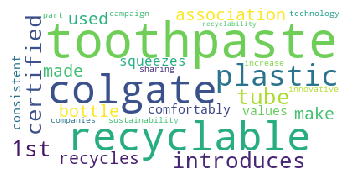

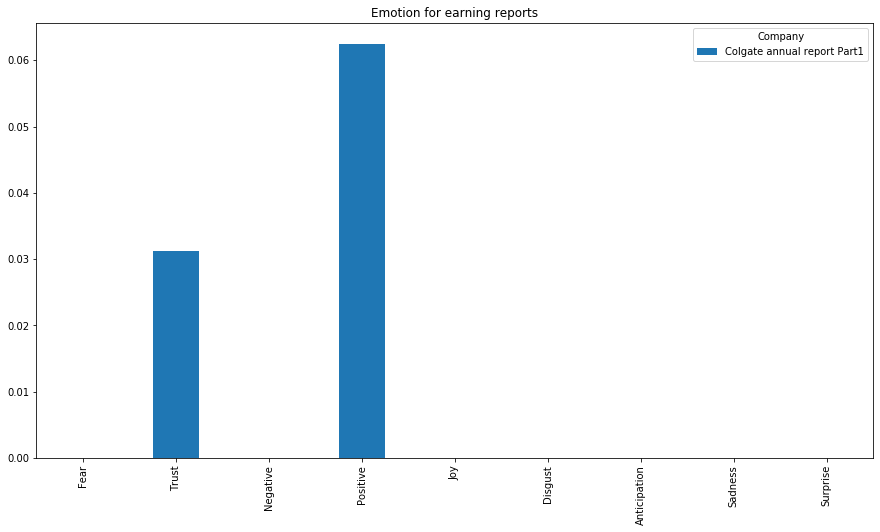

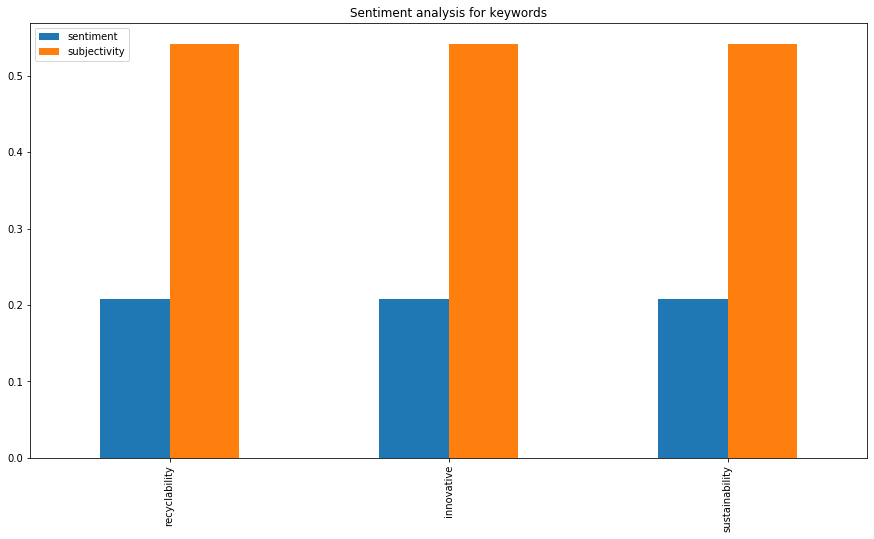

In [592]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 20)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,3)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 100, 5)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 100, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, mul, num)
Earning_report_emotion = nrc_sentiment_analysis('Colgate annual report Part1', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 3)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'Colgate annual report Part1')

In [601]:
full_text = texts[1]
full_text

'DEAR COLGATE SHAREHOLDERS\nNoel Wallace President and\nChief Executive Officer\nAs reflected in the title of this year’s annual report, 2019 was a year of Accelerating Growth for Colgate. Net sales increased 1.0% from 2018 and organic sales, or net sales excluding foreign exchange, acquisitions and divestments, grew 4.0%*. Encouragingly, our growth accelerated throughout the year, as each quarter’s growth increased sequentially from the prior quarter. Our growth was broad based, as we delivered organic sales growth in every division and across all four of our categories: oral care, personal care, home care and pet nutrition. We increased advertising investment both on an absolute basis and as a percent of net sales versus 2018 and believe our investments in advertising and innovation drove our growth.\nWe maintained our strong balance sheet and increased operating cash flow, which led the Board of Directors to authorize an increase in the quarterly cash dividend, effective in the seco

summary: As we begin 2020, we remain sharply focused on our sustainability commitments and have strong plans in place to continue our organic sales growth momentum and to maximize productivity across the income statement.
Our growth strategy centers around three key initiatives: driving premium innovation in our core businesses, pursuing adjacent categories and expanding in faster- growing channels and markets.
Now in over 100 countries, this innovation allowed us to take pricing on Colgate Total, which accelerated our organic sales growth and helped grow the multi-benefit segment.
In 2019, Colgate Total delivered its strongest organic sales growth in three years, led by key markets including the United States, Brazil and Mexico.
keywords:  ['colgate', 'growth', 'business', 'production', 'innovate', 'year', 'sustainable', 'drive', 'channel', 'increased']


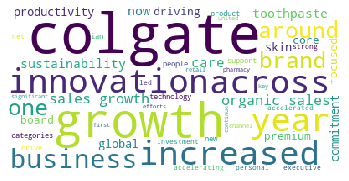

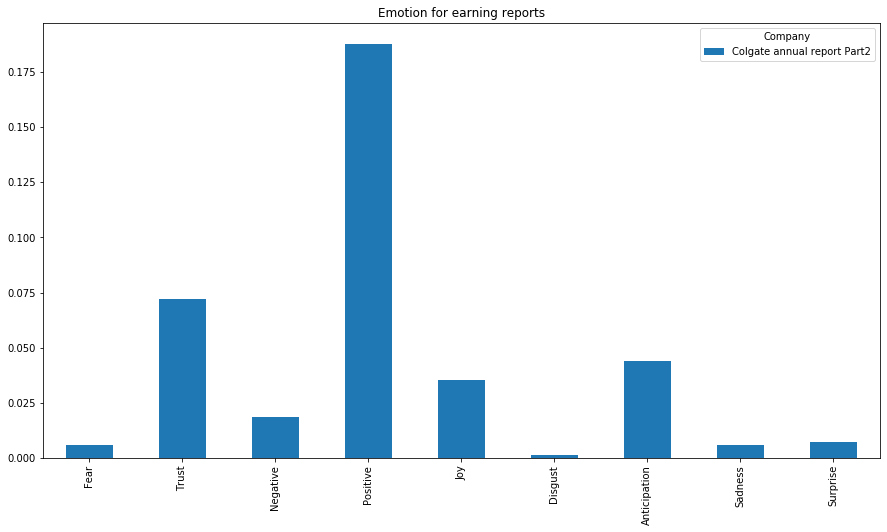

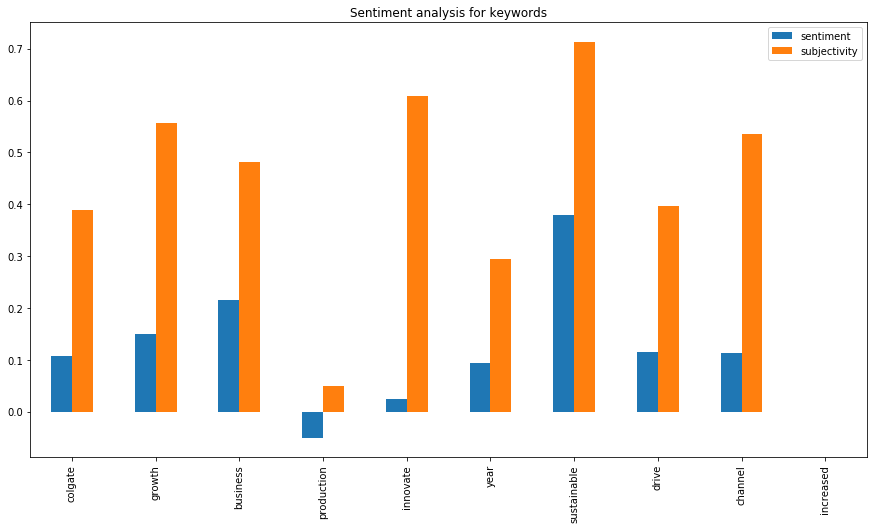

In [602]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 100)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 10)
sort_list = noun_chunks(full_text)
bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('Colgate annual report Part2', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'Colgate annual report Part2')

In [647]:
full_text = texts[2]
full_text

'SUSTAINABILITY COMMITMENT\nColgate is pleased to report excellent progress in 2019 on the Company’s 2015 to 2020 Sustainability Strategy commitment. The Company was named to both the 2019 Dow Jones Sustainability World and North America Indices and for the first time ever was the Household Industry Sector Leader. Colgate was also recognized as a U.S. EPA ENERGY STAR Partner of the Year in 2019 for the ninth year in a row. In addition to the highlights below, more about Colgate’s Sustainability Strategy progress is available in the Sustainability section of Colgate’s website at www.colgatepalmolive.com.\nPeople\nPerformance\n1.2 billion children reached in over 80 countries by Colgate’s Bright Smiles, Bright Futures oral health education program since 1991.\nIn 2019, with a new program focused on critical risk management, Colgate had the lowest number of recordable and lost work day accidents in our Company’s history.\nSince 2002, The Hill’s Food, Shelter & Love program has provided mo

summary: Colgate has made great strides in our commitment to improving the sustainability profile of our products and nearly completed eliminating PVC from our packaging and expect to meet our goal to fully eliminate in 2020.
Through cross-functional collaboration across the Colgate world, we continue to make progress and, in 2019, improved the sustainability profile in 99% of new products.
keywords:  ['commitment colgate', 'recyclability', 'sustainable', 'water', 'company', 'food', 'world', 'packaging', 'program']


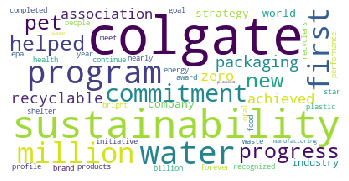

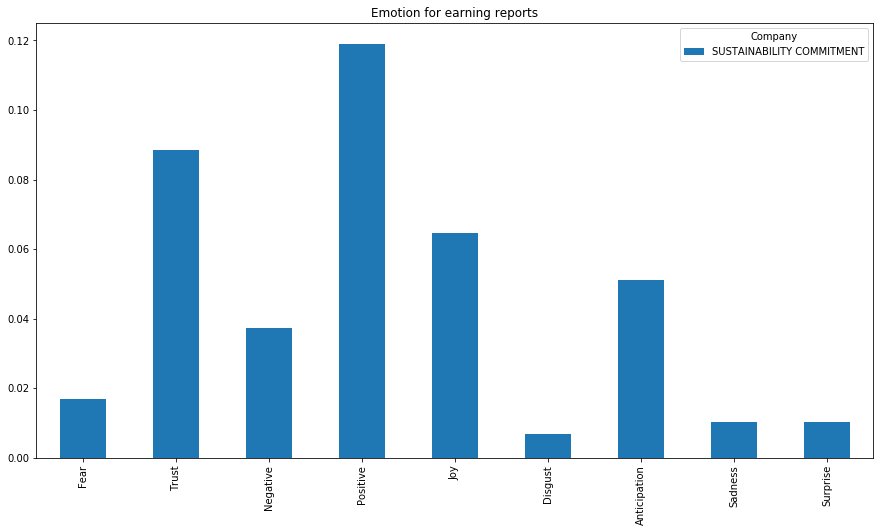

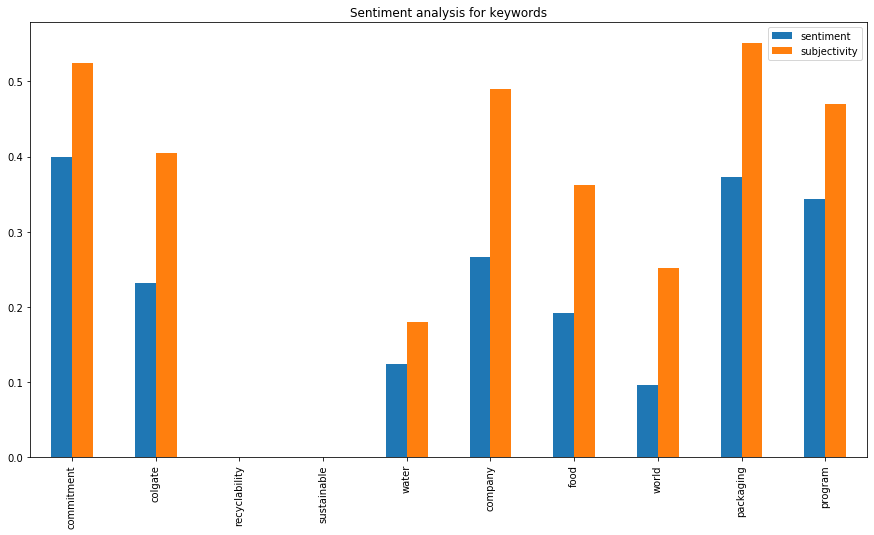

In [648]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 60)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
keyword = ['commitment', 'colgate', 'recyclability', 'sustainable', 'water', 'company', 'food', 'world', 'packaging', 'program']
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 10)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('SUSTAINABILITY COMMITMENT', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'SUSTAINABILITY COMMITMENT')

In [610]:
full_text = texts[3]
full_text

'RECONCILIATION OF NON-GAAP FINANCIAL MEASURES\nThe following is provided to supplement certain financial measures discussed in this report both as reported (GAAP) and excluding the impact of certain items (non-GAAP) as shown below. Investors and analysts use these financial measures in assessing the Company’s business performance, and management believes that presenting these financial measures on a non-GAAP basis provides them with useful supplemental information to enhance their understanding of the Company’s underlying business performance and trends. These non-GAAP financial measures also enhance the ability to compare period-to-period financial results. The Company uses these financial measures internally in its budgeting process, to evaluate segment and overall operating performance and as factors in determining compensation. While the Company believes that these financial measures are useful in evaluating the Company’s underlying business performance and trends, this informatio

summary: Investors and analysts use these financial measures in assessing the Company’s business performance, and management believes that presenting these financial measures on a non-GAAP basis provides them with useful supplemental information to enhance their understanding of the Company’s underlying business performance and trends.
keywords:  ['financial', 'company', 'gaap', 'supplemental', 'report']


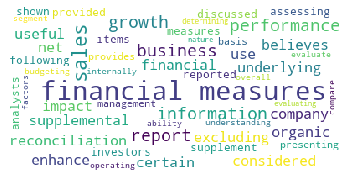

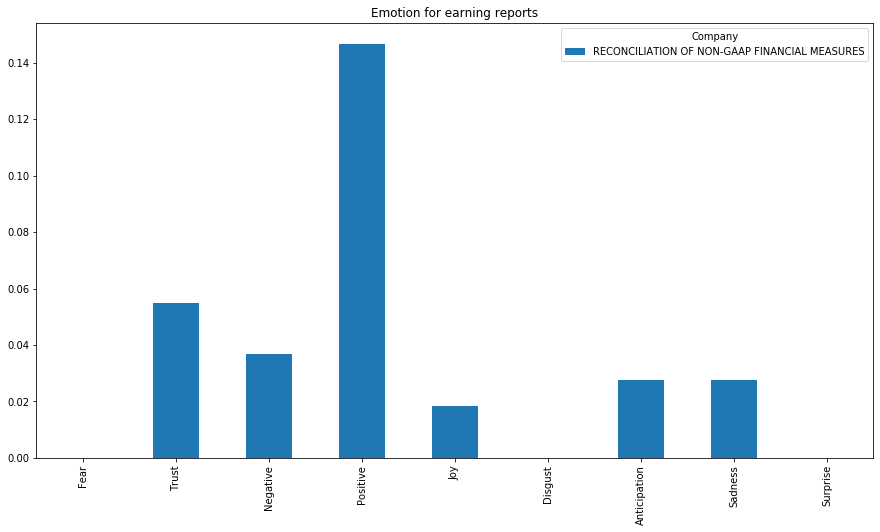

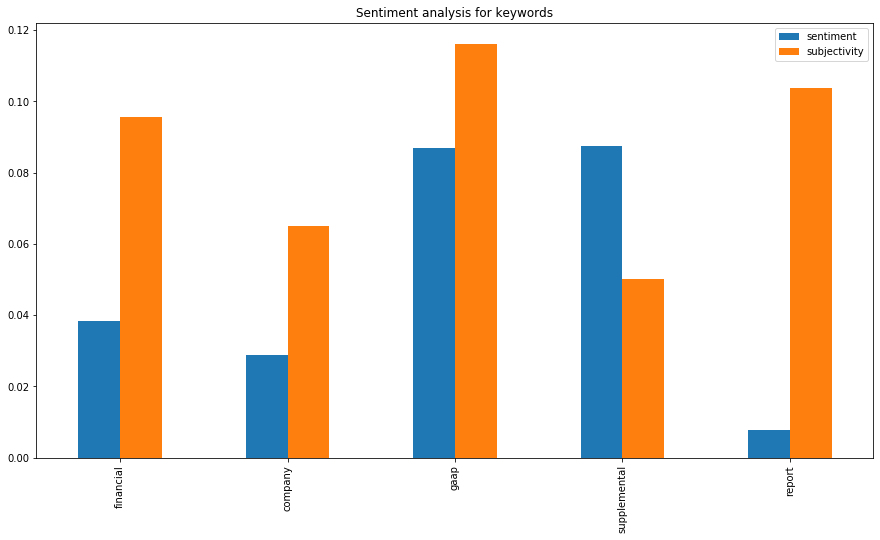

In [613]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 30)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,5)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 5)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('RECONCILIATION OF NON-GAAP FINANCIAL MEASURES', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 5)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'RECONCILIATION OF NON-GAAP FINANCIAL MEASURES')

In [645]:
full_text = texts[4]
full_text

'PARTI\nITEM 1. BUSINESS\n(a) General Development of the Business\nColgate-Palmolive Company (together with its subsidiaries, the “Company” or “Colgate”) is a leading consumer products company whose products are marketed in over 200 countries and territories throughout the world. Colgate was founded in 1806 and incorporated under the laws of the State of Delaware in 1923.\nFor recent business developments and other information, refer to the information set forth under the captions “Management’s Discussion and Analysis of Financial Condition and Results of Operations–Executive Overview,” “– Outlook,” “–Results of Operations,” “–Restructuring and Related Implementation Charges” and “– Liquidity and Capital Resources” in Part II, Item 7 of this report.\n(c) Narrative Description of the Business\nThe Company operates in two product segments: Oral, Personal and Home Care; and Pet Nutrition. Colgate is a leader in Oral Care with global leadership in the toothpaste and manual toothbrush categ

summary: Colgate is a leader in many product categories of the Personal Care market with global leadership in liquid hand soap, which it sells under the Softsoap, Palmolive and Protex brands according to market share data.
Sales of Oral, Personal and Home Care products accounted for 46%, 20% and 18%, respectively, of the Company’s total worldwide Net sales in 2019.
For more information regarding the Company’s worldwide Net sales by product category, refer to Note 1, Nature of Operations and Note 14, Segment Information to the Consolidated Financial Statements.
The Company’s Oral, Personal and Home Care products are sold to a variety of traditional and eCommerce retailers, wholesalers and distributors worldwide.
keywords:  ['product', 'colgate palmolive company', 'marketing', 'business', 'operate', 'retail', 'executive', 'information']


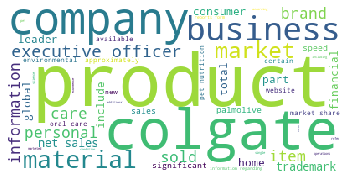

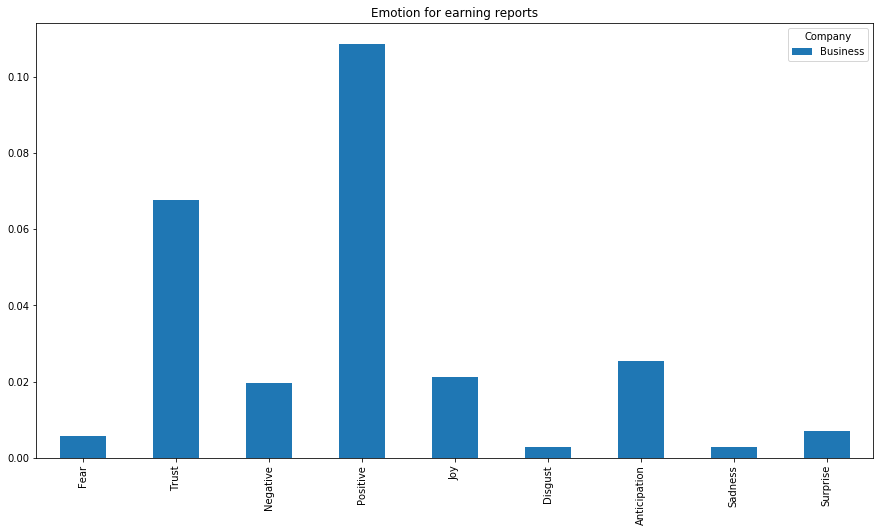

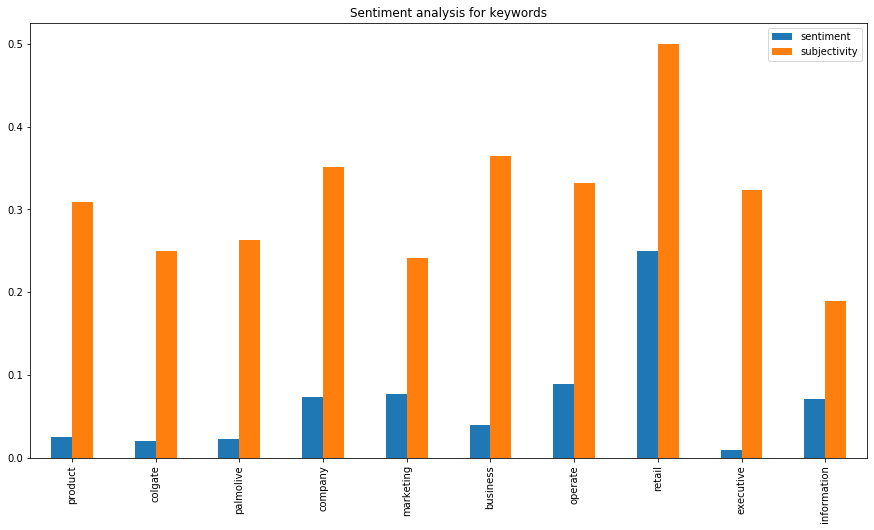

In [646]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 100)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
keyword = ['product', 'colgate', 'palmolive', 'company', 'marketing', 'business', 'operate', 'retail', 'executive', 'information']
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 10)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('Business', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'Business')

In [621]:
full_text = texts[5]
full_text

'ITEM 1A. RISK FACTORS\nIn addition to the risks described elsewhere in this report, set forth below is a summary of the material risks to an investment in our securities. These risks are not the only ones we face. Additional risks not presently known to us or that we currently deem immaterial may also have an adverse effect on us. If any of these risks actually occur, our business, results of operations, cash flows and financial condition could be materially and adversely impacted, which might cause the value of our securities to decline.\nWe face risks associated with significant international operations, including exposure to foreign currency fluctuations.\nWe operate on a global basis serving consumers in more than 200 countries and territories with approximately 70% of our Net sales originating in markets outside the U.S. While geographic diversity helps to reduce our exposure to risks in any one country or part of the world, it also means that we face risks associated with signif

summary: All of the foregoing risks could have a significant impact on our ability to sell our products on a competitive basis in international markets and may adversely affect our business, results of operations, cash flows and financial condition.
Even if a claim is unsuccessful, is without merit or is not fully pursued, the cost of responding to such a claim, including management time and out-of-pocket expenses, and the negative publicity surrounding such assertions regarding our products, processes or business practices could adversely affect our reputation, brand image and our business, results of operations, cash flows and financial condition.
keywords:  ['productivity', 'business', 'additional', 'taxe', 'adversely', 'trade', 'increased', 'change', 'marketing', 'managing']


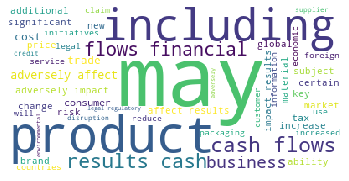

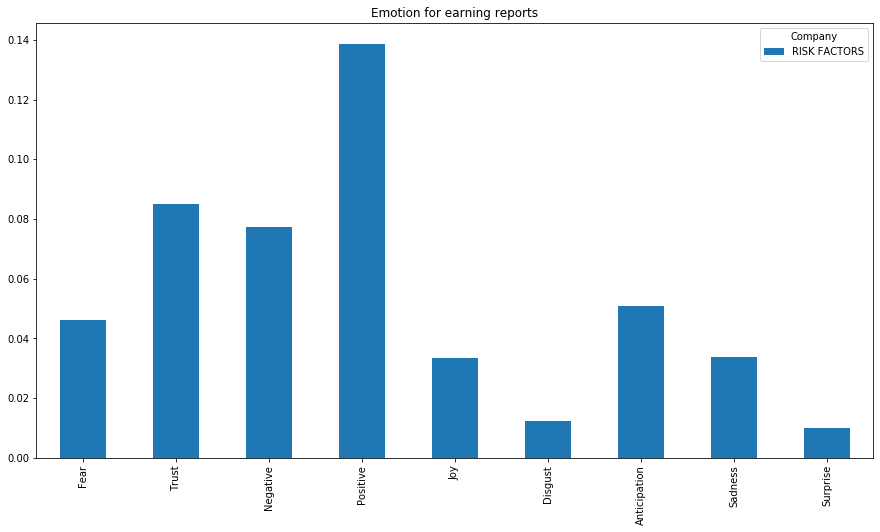

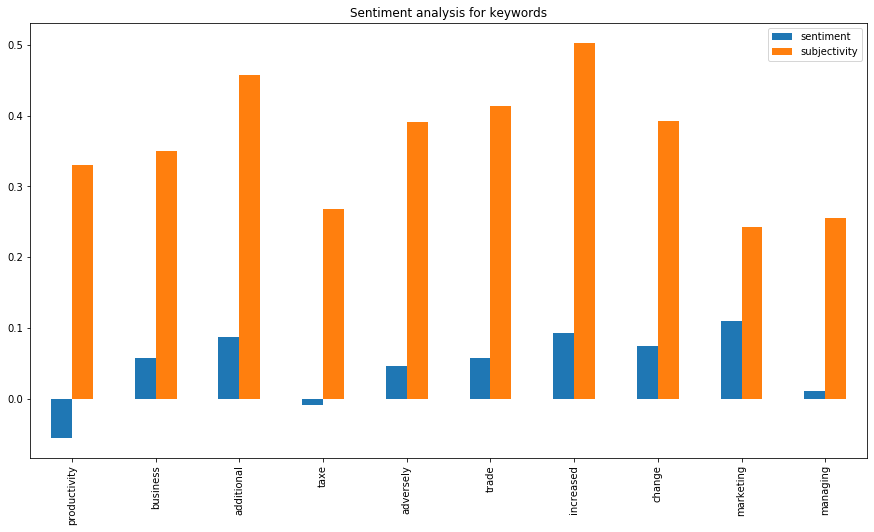

In [624]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 100)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('RISK FACTORS', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'RISK FACTORS')

In [630]:
full_text = texts[7]
full_text

'ITEM 2. PROPERTIES\nThe Company owns or leases approximately 320 properties, which include manufacturing, distribution, research and office facilities worldwide. Our corporate headquarters is located in leased property at 300 Park Avenue, New York, New York.\nIn the U.S., the Company operates in approximately 60 properties, of which 13 are owned. Major U.S. manufacturing and warehousing facilities used by the Oral, Personal and Home Care product segment of our business are located in Greenwood, South Carolina; Morristown, Tennessee; and Cambridge, Ohio. The Pet Nutrition segment has major manufacturing and warehousing facilities in Bowling Green, Kentucky; Emporia, Kansas; Richmond, Indiana; and Topeka, Kansas.\nOverseas, the Company operates in approximately 260 properties, of which 60 are owned, in over 80 countries. Major overseas manufacturing and warehousing facilities used by the Oral, Personal and Home Care product segment of our business are located in Australia, Brazil, China

summary: Major overseas manufacturing and warehousing facilities used by the Oral, Personal and Home Care product segment of our business are located in Australia, Brazil, China, Colombia, France, Greece, Guatemala, India, Italy, Mexico, Poland, South Africa, Thailand, Turkey and Venezuela.
keywords:  ['center', 'locate', 'facility', 'property', 'kansa']


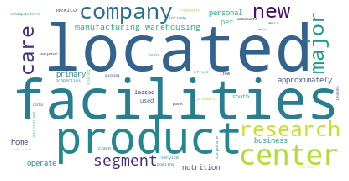

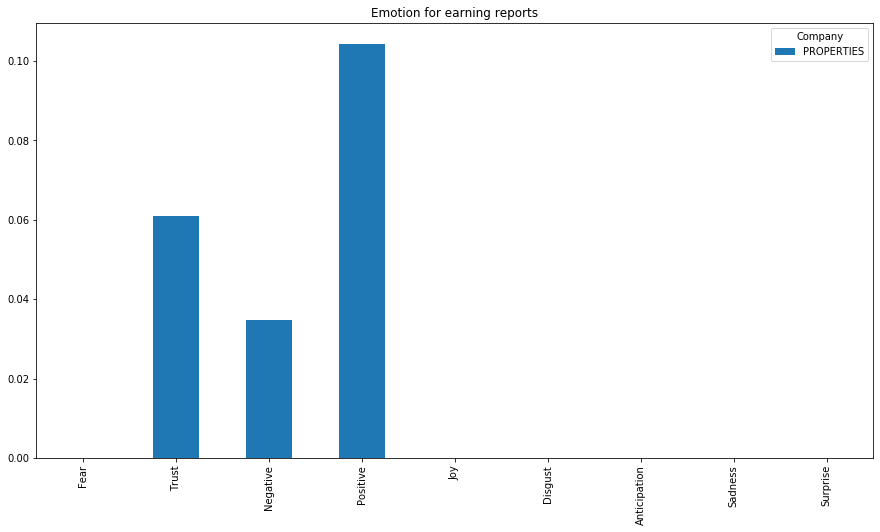

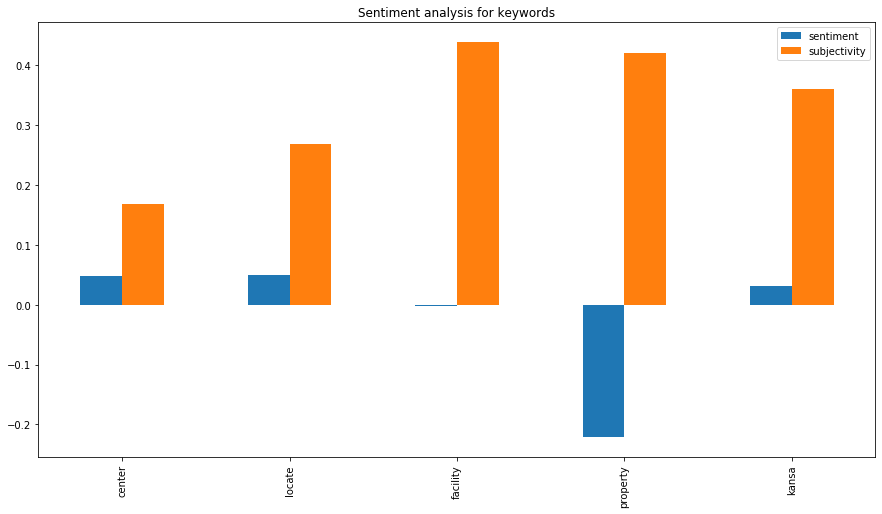

In [631]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 30)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,5)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 5)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('PROPERTIES', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 5)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'PROPERTIES')

In [642]:
full_text = texts[8]
full_text

'ITEM 3. LEGAL PROCEEDINGS\nAs a global company serving consumers in more than 200 countries and territories, the Company is routinely subject to a wide variety of legal proceedings. These include disputes relating to intellectual property, contracts, product liability, marketing, advertising, foreign exchange controls, antitrust and trade regulation, as well as labor and employment, pension, data privacy and security, environmental and tax matters, and consumer class actions. Management proactively reviews and monitors the Company’s exposure to, and the impact of, environmental matters. The Company is party to various environmental matters and, as such, may be responsible for all or a portion of the cleanup, restoration and post-closure monitoring of several sites.\nThe Company establishes accruals for loss contingencies when it has determined that a loss is probable and that the amount of loss, or range of loss, can be reasonably estimated. Any such accruals are adjusted thereafter a

summary: These include disputes relating to intellectual property, contracts, product liability, marketing, advertising, foreign exchange controls, antitrust and trade regulation, as well as labor and employment, pension, data privacy and security, environmental and tax matters, and consumer class actions.
In December 2005, the Brazilian internal revenue authority issued to the Company’s Brazilian subsidiary a tax assessment with interest, penalties and any court-mandated fees of approximately $63 million, at the current exchange rate, based on a claim that certain purchases of U.S. Treasury bills by the subsidiary and their subsequent disposition during the period 2000 to 2001 were subject to a tax on foreign exchange transactions.
keywords:  ['company', 'court', 'action', 'brazilian', 'case', 'loss', 'appeal', 'tax matter', 'assess']


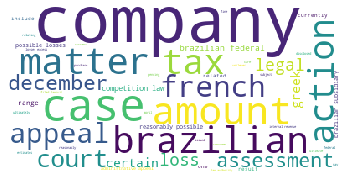

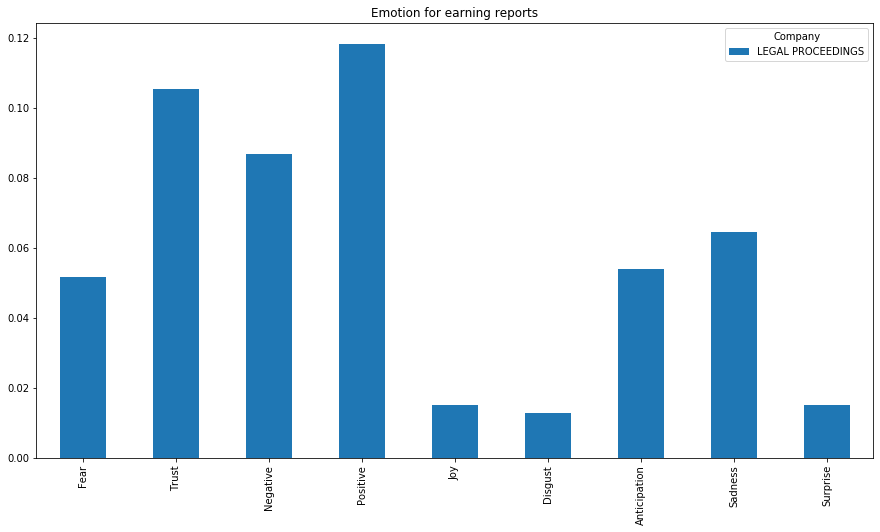

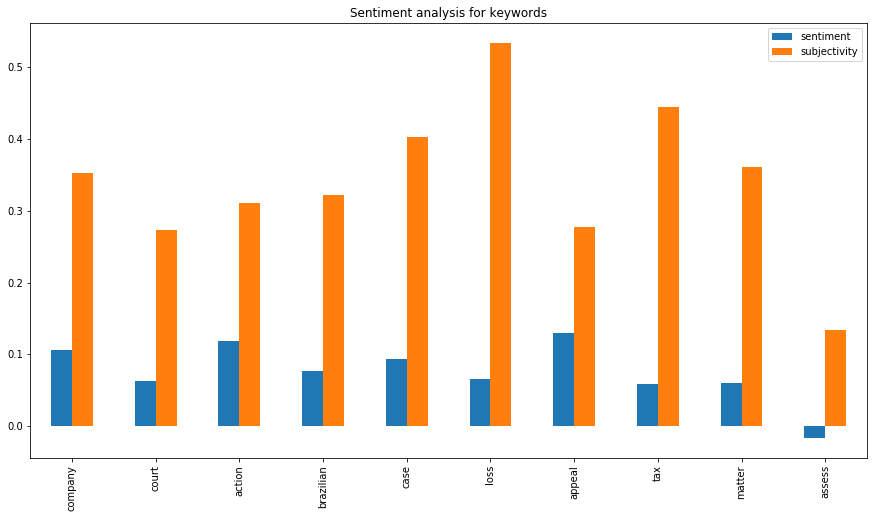

In [643]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 100)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
keyword = ['company', 'court', 'action', 'brazilian', 'case', 'loss', 'appeal', 'tax', 'matter', 'assess']
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('LEGAL PROCEEDINGS', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'LEGAL PROCEEDINGS')

In [697]:
full_text = texts[10]
full_text

'PART II\nITEM 5. MARKET FOR REGISTRANT’S COMMON EQUITY, RELATED STOCKHOLDER MATTERS AND ISSUER PURCHASES OF EQUITY SECURITIES\nFor information regarding the market for the Company’s common stock, including stock price performance graphs, refer to “Market Information” included in Part IV, Item 15 of this report. For information regarding the number of common shareholders of record, refer to “Historical Financial Summary” included in Part IV, Item 15 of this report. For information regarding the securities authorized for issuance under our equity compensation plans, refer to “Security Ownership of Certain Beneficial Owners and Management and Related Stockholder Matters” included in Part III, Item 12 of this report.\nIssuer Purchases of Equity Securities\nOn June 18, 2018, the Board authorized the repurchase of shares of the Company’s common stock having an aggregate purchase price of up to $5 billion under a new share repurchase program (the “2018 Program”), which replaced a previously 

summary: MARKET FOR REGISTRANT’S COMMON EQUITY, RELATED STOCKHOLDER MATTERS AND ISSUER PURCHASES OF EQUITY SECURITIES
For information regarding the securities authorized for issuance under our equity compensation plans, refer to “Security Ownership of Certain Beneficial Owners and Management and Related Stockholder Matters” included in Part III, Item 12 of this report.
keywords:  ['market', 'company', 'common equity', 'security']


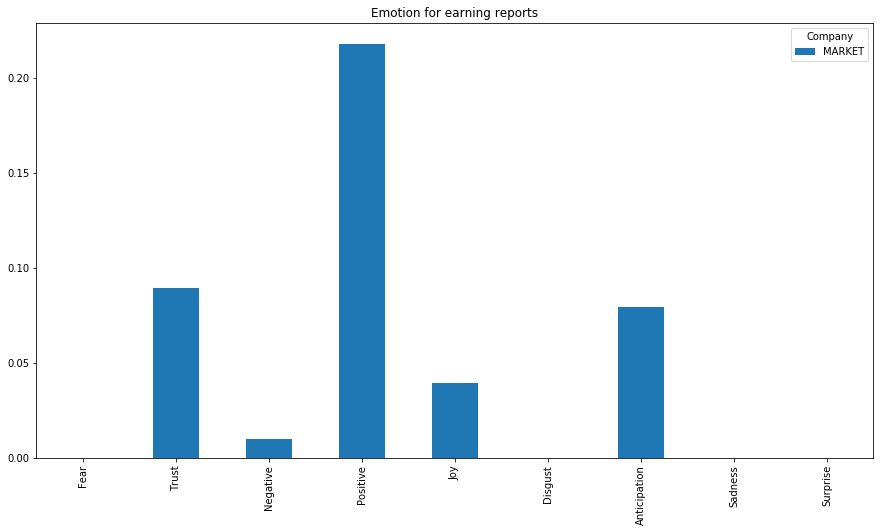

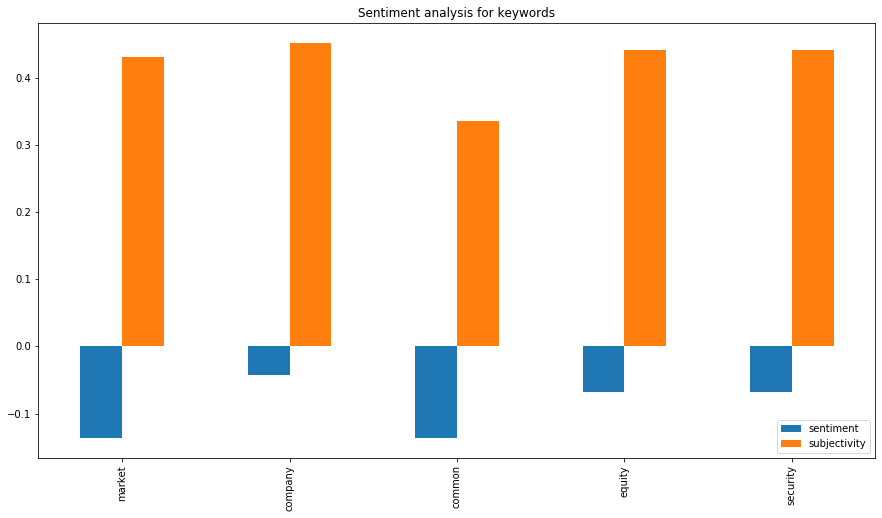

In [701]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
#wordcloud(full_text)
summary = text_summarization(full_text, 50)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,5)
print('keywords: ', keyword)
keyword = ['market', 'company', 'common', 'equity', 'security']
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 5)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 200, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('MARKET', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 5)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'MARKET')

In [650]:
full_text = texts[12]
full_text

'ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS\nExecutive Overview\nColgate-Palmolive Company (together with its subsidiaries, “we,” the “Company” or “Colgate”) seeks to deliver strong, consistent business results and superior shareholder returns by providing consumers globally with products that make their lives healthier and more enjoyable.\nTo this end, we are tightly focused on two product segments: Oral, Personal and Home Care; and Pet Nutrition. Within these segments, we follow a closely defined business strategy to grow our key product categories and increase our overall market share. Within the categories in which we compete, we prioritize our efforts based on their capacity to maximize the use of the organization’s core competencies and strong global equities and to deliver sustainable long-term growth.\nOperationally, we are organized along geographic lines with management teams having responsibility for the business and financi

summary: These indicators include net sales (including volume, pricing and foreign exchange components), organic sales growth (net sales growth excluding, the impact of foreign exchange, acquisitions, and divestments), a non-GAAP financial measure, and gross profit margin, operating profit, net income and earnings per share, in each case, on a GAAP and non-GAAP basis, as well as measures used to optimize the management of working capital, capital expenditures, cash flow and return on capital.
Net sales in the Oral, Personal and Home Care product segment were $13,168 in 2019, even with 2018, as volume growth of 2.5% and net selling price increases of 1.5% were offset by negative foreign exchange of 4.0%.
keywords:  ['company', 'marketing', 'growth', 'increased', 'business', 'global', 'taxe', 'impact', 'retail', 'result']


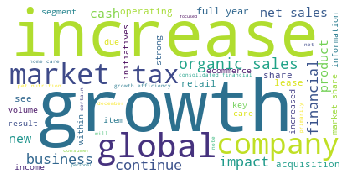

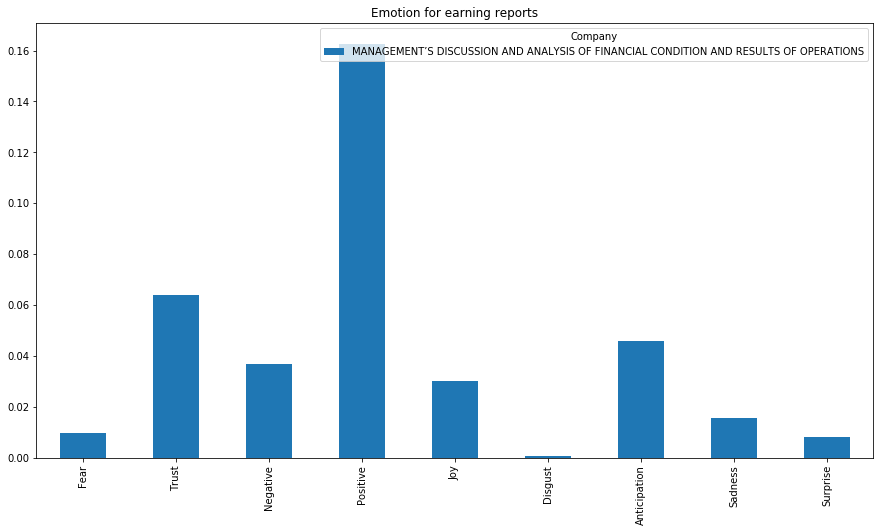

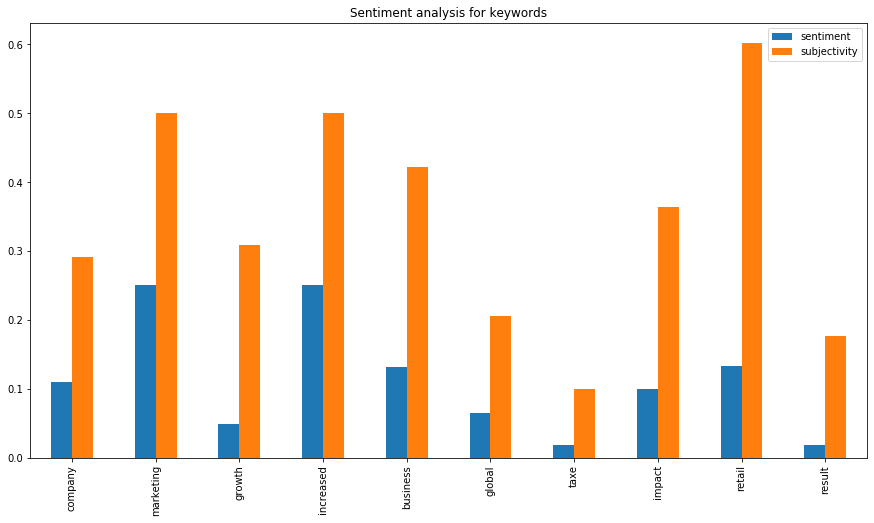

In [656]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 100)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS')

In [657]:
full_text = texts[13]
full_text

'Gross Profit/Margin\nWorldwide Gross profit increased 1% to $9,325 in 2019 from $9,231 in 2018. Gross profit in both periods included charges resulting from the Global Growth and Efficiency Program. Excluding these charges in both periods and acquisition-related costs in 2019, Gross profit increased to $9,336 in 2019 from $9,262 in 2018, reflecting an increase of $90 resulting from higher Net sales, partially offset by a decrease of $16 resulting from lower Gross profit margin.\nWorldwide Gross profit margin was 59.4% in 2019, even with 2018. Excluding charges resulting from the Global Growth and Efficiency Program in both periods and acquisition-related costs in 2019, Gross profit margin decreased by 10 basis points (bps) to 59.5% in 2019, from 59.6% in 2018. This decrease in Gross profit margin was primarily due to higher raw and packaging material costs (300 bps), which included foreign exchange transaction costs, largely offset by cost savings from the Company’s funding-the-growth

summary: Excluding charges resulting from the Global Growth and Efficiency Program in both periods, Selling, general and administrative expenses as a percentage of Net sales were 35.1% in 2019, an increase of 60 bps as compared to 2018.
Excluding charges related to the Global Growth and Efficiency program in both years and acquisition-related costs and the benefit related to a value-added tax matter in Brazil in 2019, Corporate Operating profit (loss) increased in 2019 as compared to 2018, driven primarily by the write-off of certain investments and fixed assets and higher compensation expense.
keywords:  ['company', 'cost', 'relation', 'increased', 'rating', 'asset', 'result', 'sale', 'certain', 'new']


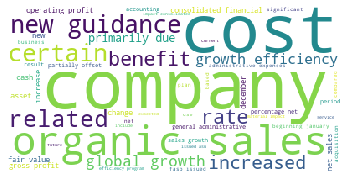

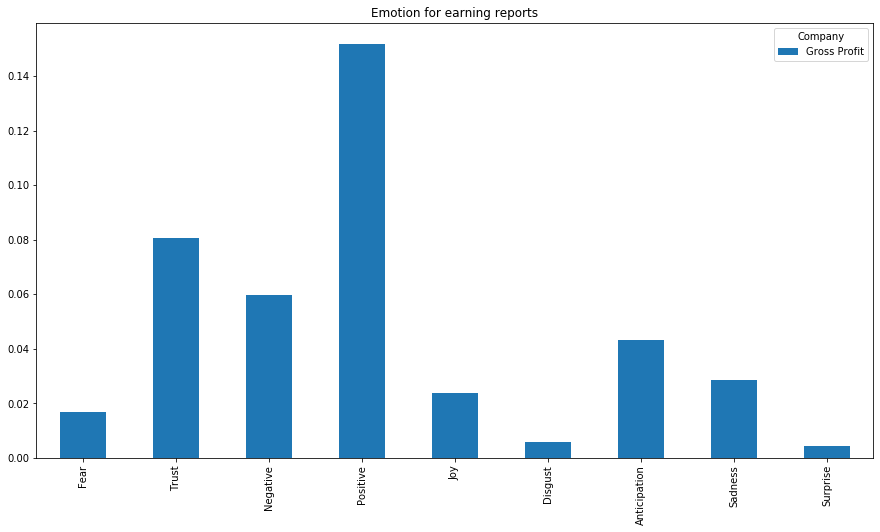

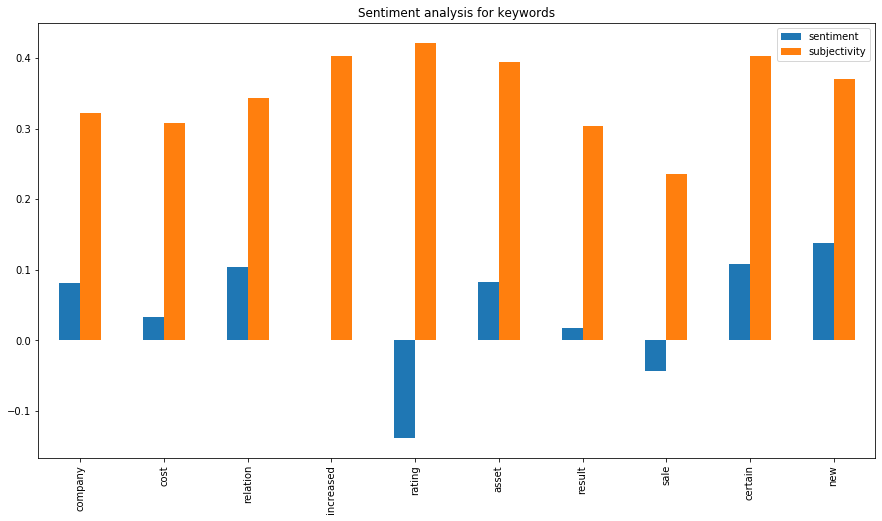

In [658]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 100)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 500, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('Gross Profit', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'Gross Profit')

In [662]:
full_text = texts[17]
full_text

'ITEM 9A. CONTROLS AND PROCEDURES Evaluation of Disclosure Controls and Procedures\nThe Company’s management, under the supervision and with the participation of the Company’s President and Chief Executive Officer and Chief Financial Officer, carried out an evaluation of the effectiveness of the design and operation of the Company’s disclosure controls and procedures as of December 31, 2019 (the “Evaluation”). Based upon the Evaluation, the Company’s President and Chief Executive Officer and Chief Financial Officer concluded that the Company’s disclosure controls and procedures (as defined in Rule 13a-15(e) of the Securities Exchange Act of 1934) are effective.\nManagement’s Annual Report on Internal Control Over Financial Reporting\nThe Company’s management is responsible for establishing and maintaining adequate internal control over financial reporting, as defined in Rules 13a-15(f) and 15d-15(f) under the Securities Exchange Act of 1934. Management, under the supervision and with t

summary: Based upon the Evaluation, the Company’s President and Chief Executive Officer and Chief Financial Officer concluded that the Company’s disclosure controls and procedures (as defined in Rule 13a-15(e) of the Securities Exchange Act of 1934) are effective.
keywords:  ['company', 'reporting', 'evaluation', 'internal', 'financial']


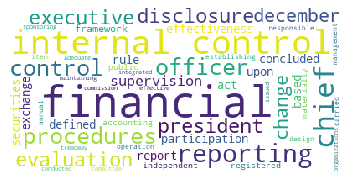

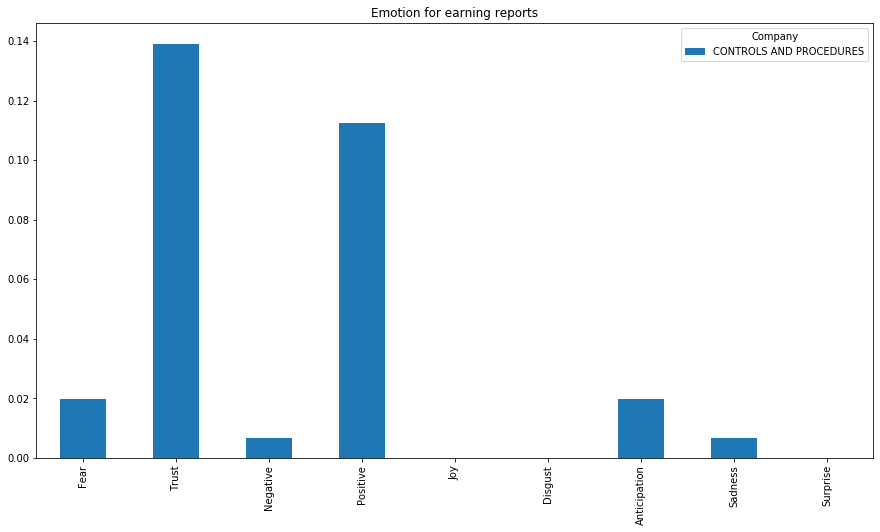

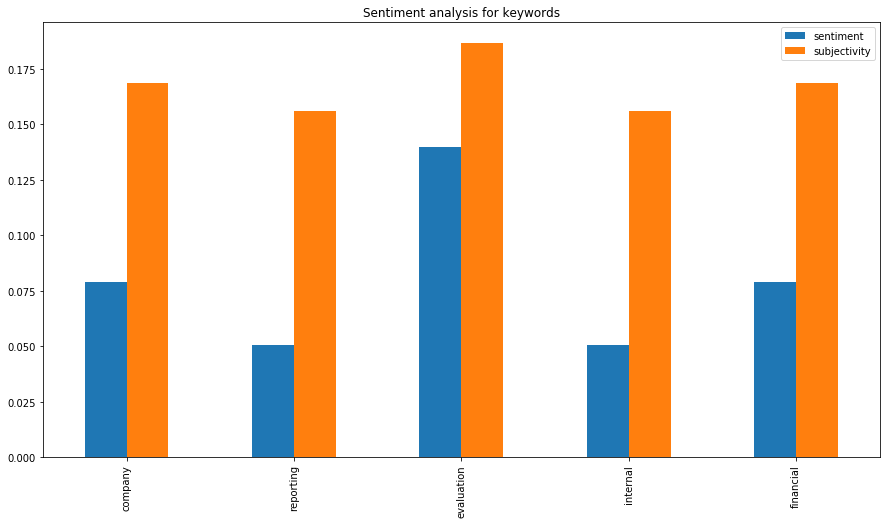

In [663]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 30)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,5)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 5)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 200, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('CONTROLS AND PROCEDURES', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 5)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'CONTROLS AND PROCEDURES')

In [702]:
full_text = texts[18]
full_text

'ITEM 9B. OTHER INFORMATION\nNone.\n\nPART III\nITEM 10. DIRECTORS, EXECUTIVE OFFICERS AND CORPORATE GOVERNANCE\nSee “Information about our Executive Officers” in Part I, Item 1 of this report.\nAdditional information required by this Item relating to directors, executive officers and corporate governance of the Company is incorporated herein by reference to the Company’s Proxy Statement for its 2020 Annual Meeting of Stockholders (the “2020 Proxy Statement”).\nCode of Ethics\nThe Company’s Code of Conduct promotes the highest ethical standards in all of the Company’s business dealings. The Code of Conduct satisfies the SEC’s requirements for a Code of Ethics for senior financial officers and applies to all Company employees, including the President and Chief Executive Officer, the Chief Financial Officer and the Vice President and Controller, and the Company’s directors. The Code of Conduct is available on the Company’s website at www.colgatepalmolive.com. Any amendment to the Code of

summary: Additional information required by this Item relating to directors, executive officers and corporate governance of the Company is incorporated herein by reference to the Company’s Proxy Statement for its 2020 Annual Meeting of Stockholders (the “2020 Proxy Statement”).
keywords:  ['company', 'code', 'officer', 'item', 'ethical']


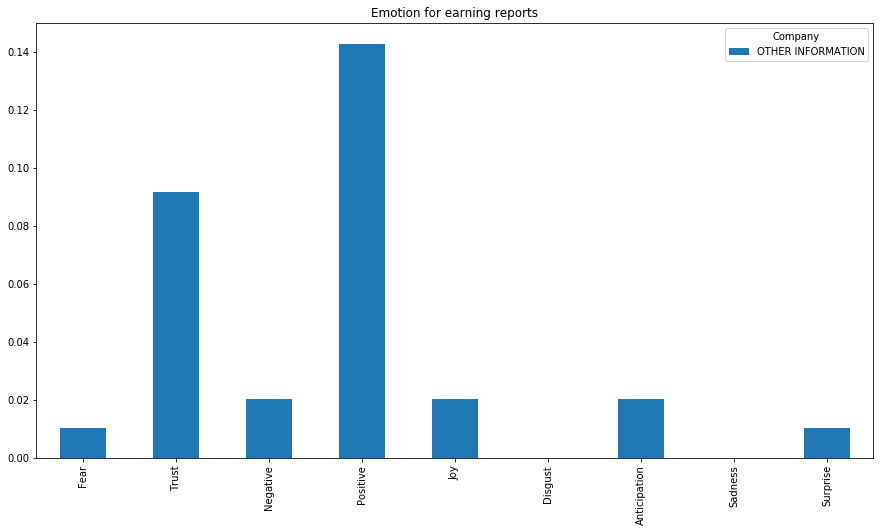

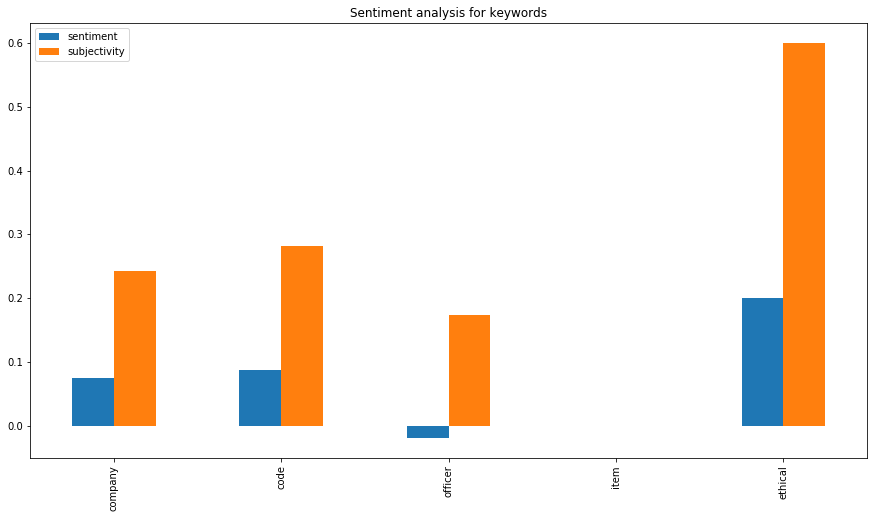

In [704]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
#wordcloud(full_text)
summary = text_summarization(full_text, 50)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,5)
print('keywords: ', keyword)
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 5)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 200, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('OTHER INFORMATION', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 5)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'OTHER INFORMATION')

In [674]:
full_text = texts[25]
full_text

"Report of Independent Registered Public Accounting Firm\nTo the Board of Directors and Shareholders of Colgate-Palmolive Company:\nOpinions on the Financial Statements and Internal Control over Financial Reporting. \nWe have audited the consolidated financial statements, including the related notes and financial statement schedule, of Colgate-Palmolive Company and its subsidiaries (the “Company”) as listed in the accompanying index. We also have audited the Company's internal control over financial reporting as of December 31, 2019, based on criteria established in Internal Control\n- Integrated Framework (2013) issued by the Committee of Sponsoring Organizations of the Treadway Commission (COSO).\nIn our opinion, the consolidated financial statements referred to above present fairly, in all material respects, the financial position of the Company as of December 31, 2019 and 2018, and the results of its operations and its cash flows for each of the three years in the period ended Dece

summary: These procedures included testing the effectiveness of controls relating to acquisition accounting, including controls over management’s valuation of the trademark intangible asset acquired and controls over development of the assumptions and estimates, including the revenue growth rates, the royalty rate, and the discount rate.
keywords:  ['company opinion', 'account', 'audit', 'management', 'statement', 'evaluation', 'effect', 'reasonableness', 'rate']


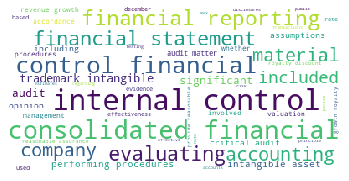

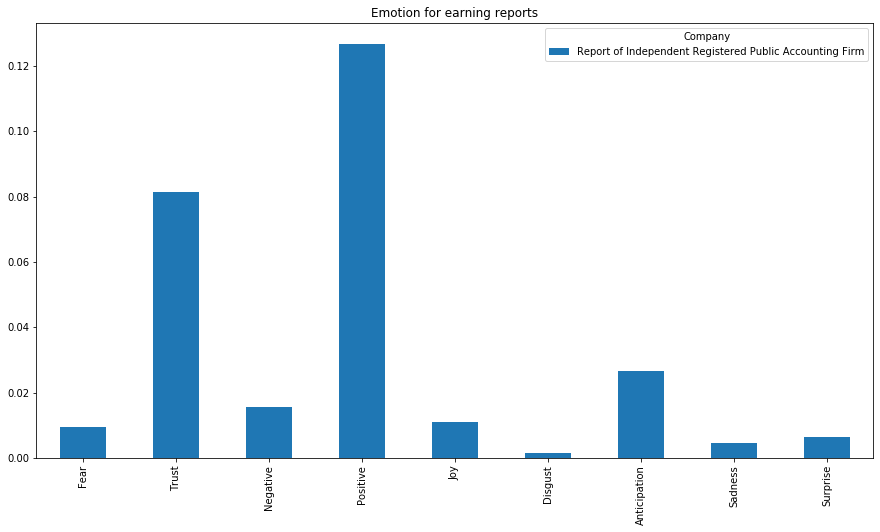

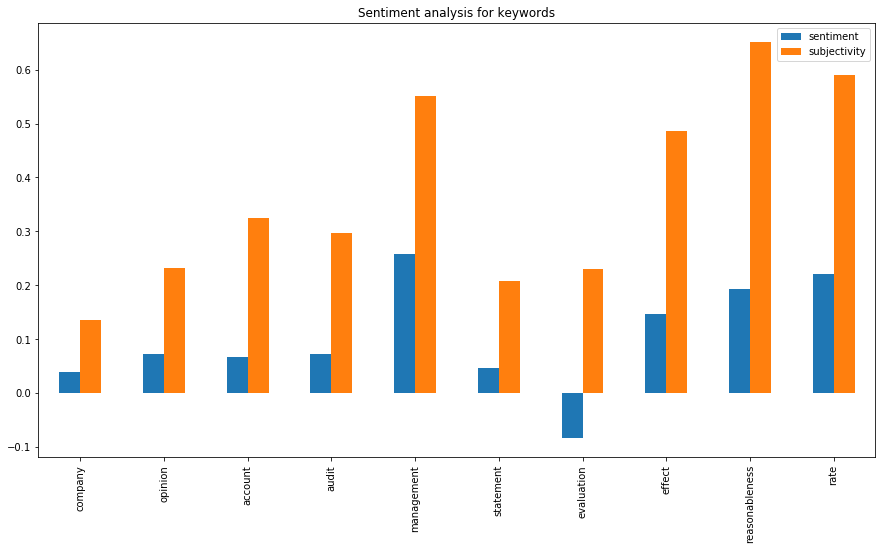

In [676]:
new_text = text_clean(full_text)
lemma_text = text_lemma(full_text)
wordcloud(full_text)
summary = text_summarization(full_text, 60)
print('summary: ' + summary)
keyword = keyword_extraction(lemma_text,10)
print('keywords: ', keyword)
keyword = ['company', 'opinion', 'account', 'audit', 'management', 'statement', 'evaluation', 'effect', 'reasonableness', 'rate']
two_words = two_grams_frequency(new_text)
bubble_chart(two_words, 200, 10)
three_words = three_grams_frequency(new_text)
bubble_chart(three_words, 200, 5)
# sort_list = noun_chunks(full_text)
# bubble_chart_noun_chunks(sort_list, 100, 1)
Earning_report_emotion = nrc_sentiment_analysis('Report of Independent Registered Public Accounting Firm', new_text)
nrc_sentiment_analysis_plot(Earning_report_emotion)
sent_df = keyword_sentiment_analysis(full_text, 10)
keyword_sentiment_analysis_plot(sent_df)
Modality_distribution(full_text, 'Report of Independent Registered Public Accounting Firm')